To do

set lambda_E/H to zero

In [1]:
import eos
import numpy as np

import os
import time
def build_time():
    return "eos built at " + time.ctime(os.path.getmtime(eos.__file__))

build_time()

'eos built at Fri Dec  4 14:19:04 2020'

In [2]:
eos.Observables(prefix='B_c', showall=True)

## To do

plot 
`B_c->D::f_+[s^1/s^0](q2)`
fuer festes q2, aber als Funktion von 1/lambda_{B_c}

und plot
als festes 1/lambda_{B_c}^2 als Fkt vom q2

## Plot $m_D^2$ vs $\lambda_B^{-1}$, fix $q^2 = 0$

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


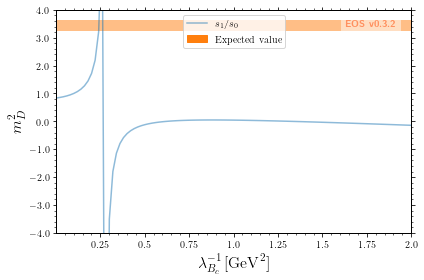

eos built at Fri Dec  4 14:19:04 2020


In [3]:
x_range = [0.001, 2]
plot_args = {
    'plot': {
        'x': { 'label': r'$\lambda_{B_c}^{-1}$', 'unit': r'$\textnormal{GeV}^2$', 'range': x_range },
        'y': { 'label': r'$m_D^2$', 'range': [-4,  4] },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        {
            'label': r'$s_1/s_0$',
            'type': 'observable',
            # y-value:
            'observable': 'B_c->D::f_+[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            'kinematics': {'q2': 0.0},
            # x-value:
            'parameter': 'B_c::1/lambda_B_p',
            'parameters': {
                'B_c->D::s_0^+,0@B-LCSR': 2,
                'B_c->D::M^2@B-LCSR': 2
            },
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [3.25, 3.65],
            'label': 'Expected value'
        }
    ]
}
eos.plot.Plotter(plot_args).plot()
print(build_time())

# Use 2pt=tw2+3 in order to exclude lambda_E, lambda_H contributions (unknown so far)

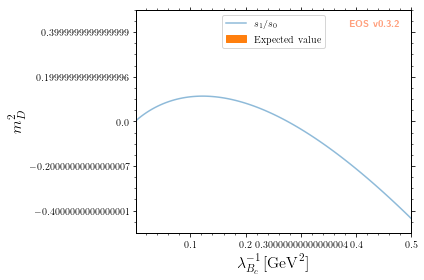

eos built at Fri Dec  4 14:19:04 2020


In [4]:
x_range = [0.001, 0.5]
plot_args = {
    'plot': {
        'x': { 'label': r'$\lambda_{B_c}^{-1}$', 'unit': r'$\textnormal{GeV}^2$', 'range': x_range },
        'y': { 'label': r'$m_D^2$', 'range': [-1/2,  1/2] },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        {
            'label': r'$s_1/s_0$',
            'type': 'observable',
            # y-value:
            'observable': 'B_c->D::f_+(q2);3pt=off,2pt=tw2+3,form-factors=B-LCSR',
            'kinematics': {'q2': 0.0},
            # x-value:
            'parameter': 'B_c::1/lambda_B_p',
            'parameters': {
                'B_c->D::s_0^+,0@B-LCSR': 2,
                'B_c->D::M^2@B-LCSR': 2
            },
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [3.25, 3.65],
            'label': 'Expected value'
        }
    ]
}
eos.plot.Plotter(plot_args).plot()
print(build_time())

# Only a small window, where the involved form factors are positive.
# Zero-crossing here inidicates the pole in the above plot

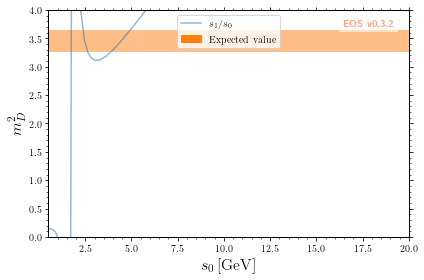

In [5]:
x_range = [0.5, 20]
plot_args = {
    'plot': {
        'x': { 'label': r'$s_0$', 'unit': r'$\textnormal{GeV}$', 'range': x_range},
        'y': { 'label': r'$m_D^2$', 'range': [0,  4] },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        {
            'label': r'$s_1/s_0$',
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            'parameter': 'B_c->D::s_0^+,0@B-LCSR',
            'kinematics': {'q2': 0.0},
            'parameters': {'B_c::1/lambda_B_p': 0.3, 'B_c->D::M^2@B-LCSR': 10},
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [3.25, 3.65],
            'label': 'Expected value'
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

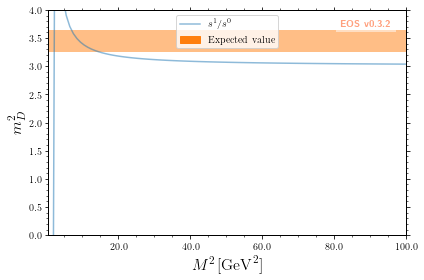

In [6]:
x_range = [0.5, 100]
plot_args = {
    'plot': {
        'x': { 'label': r'$M^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': x_range},
        'y': { 'label': r'$m_D^2$', 'range': [0,  4] },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        {
            'label': r'$s^1/s^0$',
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            # The Borel parameter:
            'parameter': 'B_c->D::M^2@B-LCSR',
            'kinematics': {'q2': 0.0},
            'parameters': {'B_c::1/lambda_B_p': 0.3, 'B_c->D::s_0^+,0@B-LCSR': 2.5},
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [3.25, 3.65],
            'label': 'Expected value'
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

In [12]:
analysis_args = {
    'global_options': {  },
    'priors': [
        # Form factors suggest:
        { 'parameter': 'B_c::1/lambda_B_p',        'min':  0.1,   'max':  1.0      , 'type': 'uniform'},
        { 'parameter': 'B_c->D::s_0^+,0@B-LCSR',   'min':  1.0,   'max':  6.0      , 'type': 'uniform'},
        # Prev. LCDA SR calcucation with u-quark:
        { 'parameter': 'B_c->D::M^2@B-LCSR',       'min':  0.5,   'max':  1.5      , 'type': 'uniform'},
    ],
    'likelihood': [],
    'manual_constraints': {
        'B_c->D::f_+[s^1/s^0]@0GeV2': {
            'observable': 'B_c->D::f_+[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            'kinematics': {'q2': -10.0},
            'mean': 3.5,
            'sigma-stat': {'hi': 0, 'lo': 0},
            'sigma-sys': {'hi': 0.2, 'lo': 0.2},
            'dof': 1,
            'type': 'Gaussian',
            'options': {'rescale-factor': 0}
        }
    }
}

analysis = eos.Analysis(**analysis_args)
analysis.parameters['B_c::1/lambda_B_p'].set(0.8)

# run analysis
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

# to do:
# Add more manual constraints at different q2 (2 or 3 values, -10, -5, 0) per ff f_0, f_+
# -> Does a consistent value of lambda exists (for now in the same decay) ==> Can also describe D* decays?
# 1.) Add constraints, make a fit
# 2.) Marcov Chains

parameter,value
B_c::1/lambda_B_p,0.1753
"B_c->D::s_0^+,0@B-LCSR",1.1842
B_c->D::M^2@B-LCSR,0.8750
